# 트리맵 만드는 방법



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [3]:
# JSON 파일 경로 지정
json_file_path = '/content/drive/MyDrive/혼효림/2.Ground_Truth_JSON_전체/FR_AP_36702003_075_FGT.json'  # 실제 파일 경로로 변경해야 합니다.

# JSON 파일 열기
with open(json_file_path, 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

In [4]:
path ='/content/drive/MyDrive/혼효림/2.Ground_Truth_JSON_전체'
json_filename = sorted(os.listdir(path))
json_filename[0]

'FR_AP_36702003_075_FGT.json'

In [5]:
# meta json파일에서 좌상단 좌표 가져오기
meta_data_path = '/content/drive/MyDrive/혼효림/4.메타데이터/FR_AP_36702003_075_META.json'  # 실제 파일 경로로 변경해야 합니다.

# JSON 파일 열기
with open(meta_data_path, 'r', encoding='latin-1') as meta_file:
    meta_data = json.load(meta_file)

In [6]:
a = meta_data[0]['coordinates'].split(',')
x = float(a[0].strip())
y = float(a[1].strip())
x, y

(228207.9118, 488653.28)

In [7]:
path ='/content/drive/MyDrive/혼효림/4.메타데이터'

In [8]:
meta_data_filename = sorted(os.listdir(path))
meta_data_filename[0]

'FR_AP_36702003_075_META.json'

In [9]:
# 정호님 버전
import cv2
import numpy as np
import matplotlib.pyplot as plt
class_dic = {'소나무': 1, '낙엽송': 2, '기타침엽수': 3, '활엽수': 4, '침엽수':5, '판독불가':6, '비산림': 7}

# 각 JSON 파일에 대해 trimap 생성 및 저장
for i, j in zip(json_filename, meta_data_filename):
    # 마스크 초기화
    mask1 = np.zeros((512, 512), dtype=np.uint8)
    json_file_path = '/content/drive/MyDrive/혼효림/2.Ground_Truth_JSON_전체/{}'.format(i)
    with open(json_file_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
    meta_file_path = '/content/drive/MyDrive/혼효림/4.메타데이터/{}'.format(j)
    with open(meta_file_path, 'r', encoding='latin-1') as meta_file:
        meta_data = json.load(meta_file)
    left_coordinate = meta_data[0]['coordinates']
    new = left_coordinate.split(',')
    x = float(new[0].strip())
    y = float(new[1].strip())
    all_coordinates = []
    for a in range(len(data['features'])):
        for b in range(len(data['features'][a]['geometry']['coordinates'])):
            coordinate = data['features'][a]['geometry']['coordinates'][b]
            all_coordinates += coordinate
    # 전체 좌표를 결합하여 최소 및 최대 찾기
    # 경도 및 위도를 따로 추출
    longitudes, latitudes = zip(*all_coordinates)
    # 최소 및 최대 값을 찾아 우하단 좌표 설정하기
    xr = max(longitudes)
    yr = min(latitudes)
    # GeoJSON 데이터를 이용하여 trimap에 폴리곤 영역을 표시
    for feature in data['features']:
        properties = feature['properties']
        geometry = feature['geometry']
        # 'properties'에 'ANN_NM'이라는 키가 있고, 그 값이 class_dic에 있는 클래스에 해당하는 경우
        class_name = properties.get('ANN_NM')
        if class_name in class_dic:
            class_num = class_dic[class_name]
            coordinates = geometry['coordinates'][0]
            # 폴리곤 좌표를 마스크 크기에 맞게 정규화
            coordinates = np.array(coordinates)
            coordinates[:, 0] -= x  # 좌상단 기준 상대값 x
            coordinates[:, 1] -= y  # 좌상단 기준 상대값 y
            coordinates[:, 0] = abs((coordinates[:, 0] / (xr - x)) * (mask1.shape[1] - 1))
            coordinates[:, 1] = abs((coordinates[:, 1] / (yr - y)) * (mask1.shape[0] - 1))
            # 폴리곤 영역을 trimap에 그리기
            cv2.fillPoly(mask1, [coordinates.astype(int)], class_num)
    # 결과 이미지 저장
    output_path = '/content/drive/MyDrive/혼효림/trimap/{}.png'.format(i[:-5])
    cv2.imwrite(output_path, mask1)
    # 저장된 이미지 파일 확인 (선택적)
    print(f"이미지가 성공적으로 생성되었고 '{output_path}'에 저장되었습니다.")

이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_075_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_096_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_097_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_117_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_135_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_213_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_274_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_332_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_492_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702012_019_FGT.png'에 저장되었습니다.
이미지가 성공적으로 생성되었고 '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702012_036_FGT.png'에 저장되었습니다.
이미지가 성공적으로

In [10]:
from PIL import Image
import numpy as np

# 저장된 이미지 파일 경로
image_path = '/content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_075_FGT.png'

# 이미지 열기
trimap_image = Image.open(image_path)

# 이미지를 NumPy 배열로 변환
trimap_array = np.array(trimap_image)

# 배열 확인 (선택적)
print("NumPy 배열:")
print(trimap_array)

NumPy 배열:
[[3 3 3 ... 3 3 0]
 [3 3 3 ... 3 3 0]
 [3 3 3 ... 3 3 0]
 ...
 [3 3 3 ... 4 4 0]
 [3 3 3 ... 4 4 0]
 [3 3 3 ... 4 4 0]]


In [ ]:
#카테코기
#110 소나무
#120 낙엽송
#130 기타침엽수
#140 활엽수
#150 침엽수
#180 판독불가
#190 비산림

## tiff to jpg


In [11]:
path = '/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀'

In [12]:
import os
file_list = os.listdir(path)
file_list

['FR_AP_36702003_075.tif',
 'FR_AP_36702003_056.tif',
 'FR_AP_36702003_108.tif',
 'FR_AP_36702003_147.tif',
 'FR_AP_36702003_135.tif',
 'FR_AP_36702003_098.tif',
 'FR_AP_36702003_132.tif',
 'FR_AP_36702003_097.tif',
 'FR_AP_36702003_095.tif',
 'FR_AP_36702003_117.tif',
 'FR_AP_36702003_127.tif',
 'FR_AP_36702003_128.tif',
 'FR_AP_36702003_114.tif',
 'FR_AP_36702003_217.tif',
 'FR_AP_36702003_096.tif',
 'FR_AP_36702003_094.tif',
 'FR_AP_36702003_116.tif',
 'FR_AP_36702003_216.tif',
 'FR_AP_36702003_148.tif',
 'FR_AP_36702003_115.tif',
 'FR_AP_36702003_187.tif',
 'FR_AP_36702003_213.tif',
 'FR_AP_36702003_089.tif',
 'FR_AP_36702003_076.tif',
 'FR_AP_36702003_254.tif',
 'FR_AP_36702003_356.tif',
 'FR_AP_36702003_336.tif',
 'FR_AP_36702003_274.tif',
 'FR_AP_36702003_277.tif',
 'FR_AP_36702003_236.tif',
 'FR_AP_36702003_257.tif',
 'FR_AP_36702003_232.tif',
 'FR_AP_36702003_233.tif',
 'FR_AP_36702003_237.tif',
 'FR_AP_36702003_255.tif',
 'FR_AP_36702003_256.tif',
 'FR_AP_36702003_337.tif',
 

In [13]:
len(file_list)

722

In [14]:
len(file_list)
filepath_list = []
for name in file_list:
    name = path +'/'+ name
    filepath_list.append(name)

filepath_list[0]

'/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/FR_AP_36702003_075.tif'

In [15]:
from PIL import Image
import os

def convert_tiff_to_jpg(input_path, output_path):
    try:
        # TIFF 이미지 열기
        tiff_image = Image.open(input_path)

        # JPEG로 저장
        tiff_image.convert('RGB').save(output_path, 'JPEG')

        print(f"{input_path}를 {output_path}로 변환 완료")
    except Exception as e:
        print(f"오류 발생: {e}")


In [16]:
file_list[0]

'FR_AP_36702003_075.tif'

In [17]:
file_list[0][:-4]

'FR_AP_36702003_075'

In [18]:
for i in file_list:

    input_tiff_path = '/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/{}'.format(i)
    output_jpg_path = '/content/drive/MyDrive/혼효림/images/{}.jpg'.format(i[:-4])
    convert_tiff_to_jpg(input_tiff_path, output_jpg_path)

/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/FR_AP_36702003_075.tif를 /content/drive/MyDrive/혼효림/images/FR_AP_36702003_075.jpg로 변환 완료
/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/FR_AP_36702003_056.tif를 /content/drive/MyDrive/혼효림/images/FR_AP_36702003_056.jpg로 변환 완료
/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/FR_AP_36702003_108.tif를 /content/drive/MyDrive/혼효림/images/FR_AP_36702003_108.jpg로 변환 완료
/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/FR_AP_36702003_147.tif를 /content/drive/MyDrive/혼효림/images/FR_AP_36702003_147.jpg로 변환 완료
/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/FR_AP_36702003_135.tif를 /content/drive/MyDrive/혼효림/images/FR_AP_36702003_135.jpg로 변환 완료
/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/FR_AP_36702003_098.tif를 /content/drive/MyDrive/혼효림/images/FR_AP_36702003_098.jpg로 변환 완료
/content/drive/MyDrive/혼효림/1.Fine_항공사진_512픽셀/FR_AP_36702003_

In [19]:
len(os.listdir('/content/drive/MyDrive/혼효림/images'))

722

## tiff to png

In [20]:
from PIL import Image
import os

def convert_tiff_to_png(input_path, output_path):
    try:
        # TIFF 이미지 열기
        tiff_image = Image.open(input_path)

        # PNG로 저장
        tiff_image.save(output_path, 'PNG')

        print(f"{input_path}를 {output_path}로 변환 완료")
    except Exception as e:
        print(f"오류 발생: {e}")



In [21]:
path = '/content/drive/MyDrive/혼효림/1.Ground_Truth_Tiff'

In [22]:
import os
file_list = os.listdir(path)
file_list[0], len(file_list)

('FR_AP_37604057_009_FGT.tif', 624)

In [23]:
for i in file_list:

    input_tiff_path = '/content/drive/MyDrive/혼효림/1.Ground_Truth_Tiff/{}'.format(i)
    output_png_path = '/content/drive/MyDrive/혼효림/ground_truth/{}.png'.format(i[:-4])
    convert_tiff_to_png(input_tiff_path, output_png_path)

/content/drive/MyDrive/혼효림/1.Ground_Truth_Tiff/FR_AP_37604057_009_FGT.tif를 /content/drive/MyDrive/혼효림/ground_truth/FR_AP_37604057_009_FGT.png로 변환 완료
/content/drive/MyDrive/혼효림/1.Ground_Truth_Tiff/FR_AP_37604057_010_FGT.tif를 /content/drive/MyDrive/혼효림/ground_truth/FR_AP_37604057_010_FGT.png로 변환 완료
/content/drive/MyDrive/혼효림/1.Ground_Truth_Tiff/FR_AP_37604057_001_FGT.tif를 /content/drive/MyDrive/혼효림/ground_truth/FR_AP_37604057_001_FGT.png로 변환 완료
/content/drive/MyDrive/혼효림/1.Ground_Truth_Tiff/FR_AP_37604057_006_FGT.tif를 /content/drive/MyDrive/혼효림/ground_truth/FR_AP_37604057_006_FGT.png로 변환 완료
/content/drive/MyDrive/혼효림/1.Ground_Truth_Tiff/FR_AP_37604057_008_FGT.tif를 /content/drive/MyDrive/혼효림/ground_truth/FR_AP_37604057_008_FGT.png로 변환 완료
/content/drive/MyDrive/혼효림/1.Ground_Truth_Tiff/FR_AP_37604057_011_FGT.tif를 /content/drive/MyDrive/혼효림/ground_truth/FR_AP_37604057_011_FGT.png로 변환 완료
/content/drive/MyDrive/혼효림/1.Ground_Truth

In [24]:
len(os.listdir('/content/drive/MyDrive/혼효림/ground_truth'))

624

# 혼효림 UNET 돌려보기



## Segmentation Dataset 설명

https://www.robots.ox.ac.uk/~vgg/data/pets/

- 대략 200개, 37개 범주의 애완 동물 데이터 세트
- a large variations in scale, pose and lighting
- annotation : 견종, head ROI, pixel level segment

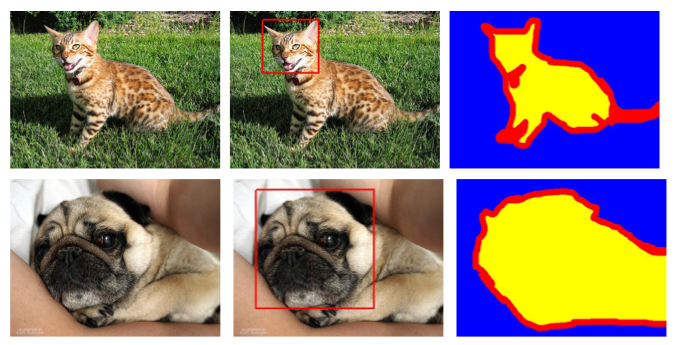

In [25]:
!pip install keras-unet-collection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.5 MB/s eta 0:00:00


In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import random
from IPython.display import Image, display

import cv2
from PIL import ImageOps

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, Dropout, Activation, UpSampling2D, GlobalMaxPooling2D, multiply
from tensorflow.keras.backend import max
from tensorflow.python.client import device_lib

from keras_unet_collection import models, base, utils

## 0) Set Memory_limit

In [27]:
# 메모리 용량을 초과하지 않도록 하여 메모리 부족을 방지하기 위한 설정

for dev in device_lib.list_local_devices(): # 사용가능한 device(CPU, GPU 등) 목록
    print(dev.device_type, dev.memory_limit)
gpu_max_mem = float(device_lib.list_local_devices()[0].memory_limit)
gpu_mem_limit = 12 # 12기가가 최대

# GPUOptions : mem limit 등 GPU option 설정
# per_process_gpu_memory_fraction : 사용 가능한 GPU 메모리의 비율 지정
memory_frac = 1024*1024*1024*gpu_mem_limit/gpu_max_mem # 기가바이트로 맞추기 위해 1024를 곱해줌
config = tf.compat.v1.ConfigProto(
    gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=memory_frac)
    )
sess = tf.compat.v1.Session(config=config)

CPU 268435456
GPU 14410383360


## 1) Download Oxford Pet Data

## 2) EDA

- Trimap :
    1. Foreground - white,  
    2. Background - black,
    3. Transition - gray
- xml : Head bbox annotations in PASCAL VOC Format
- list.txt : all images info in the dataset
    1. img filename
    2. ID : 37 CLASS ID
    3. SPECIES : 1(CAT), 2(DOG)
    4. BREED : 1-25(CAT), 1-12(DOG)

In [97]:
## 이미지 데이터 path 지정
input_dir = "/content/drive/MyDrive/혼효림/images"
target_dir = "/content/drive/MyDrive/혼효림/trimap" # 정답이미지들
img_size = (512, 512)
num_classes = 7
batch_size = 32

input_img_paths = sorted([os.path.join(input_dir, fname) for fname in os.listdir(input_dir)
                                                            if fname[-3:] == "jpg"])
target_img_paths = sorted([os.path.join(target_dir, fname) for fname in os.listdir(target_dir)
                                                            if fname[-3:] == "png" and fname[0] !="."])

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:3], target_img_paths[:3]):
    print(input_path, "|", target_path)

Number of samples: 722
/content/drive/MyDrive/혼효림/images/FR_AP_36702003_056.jpg | /content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_075_FGT.png
/content/drive/MyDrive/혼효림/images/FR_AP_36702003_075.jpg | /content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_096_FGT.png
/content/drive/MyDrive/혼효림/images/FR_AP_36702003_076.jpg | /content/drive/MyDrive/혼효림/trimap/FR_AP_36702003_097_FGT.png


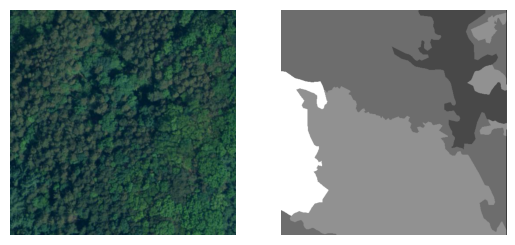

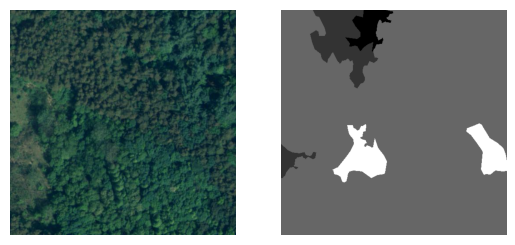

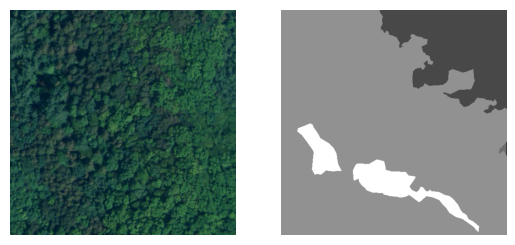

In [98]:
## 학습 데이터 확인
for img_idx in range(3):
    ori_img = image.load_img(input_img_paths[img_idx])
    target_img = ImageOps.autocontrast(image.load_img(target_img_paths[img_idx]))

    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(ori_img)

    plt.subplot(1,2,2)
    plt.axis("off")
    plt.imshow(target_img, vmax = 3, vmin = 0)
    plt.show()

## 3) Set DataLoader

In [99]:
class OxfordPetDataset(keras.utils.Sequence): # 데이터셋을 가지고 리스트 같은 객체를 만들고자 함

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths


    def __len__(self):
        return len(self.target_img_paths) // self.batch_size  # 배치사이즈로 나눈 만큼 나옴 == total batch 개수

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size

        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]

        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        # 4차원 (배치사이즈, 이미지사이즈, 이미지사이즈, 3) 으로 0으로 채움
        for j, path in enumerate(batch_input_img_paths):
            img = image.load_img(path, target_size=self.img_size)
            x[j] = img
        # 0으로 채워진 데이터에 이미지를 로드하기 (배치 사이즈만큼 for문 돌기)

        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        # 4차원 (배치사이즈, 이미지사이즈, 이미지사이즈, 1) 으로 0으로 채움 : 여기는 RGB 1차원
        for j, path in enumerate(batch_target_img_paths):
            img = image.load_img(path, target_size=self.img_size, color_mode="grayscale")
            # 그레이스케일은 채널값이 표현되지 않는다. 즉, 2차원이다 (배치사이즈, 배치사이즈)
            y[j] = np.expand_dims(img, 2) # (배치사이즈, 배치사이즈, 1)

            # target data에 있는 라벨인 1, 2, 3 에서 1을 빼서 0, 1, 2 로 변경
            y[j] -= 1
        return x, y


In [100]:
# 배치사이즈 32, 인덱스가 0
# i = 0
# 인풋, 타겟 0 31번째 데이터 경로가 들어감
# 32+128+

## 4) Preparation Dataset with DataLoader

In [129]:
# train, val split
#val_samples = 100
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)

train_input_img_paths = input_img_paths[:100]
train_target_img_paths = target_img_paths[:100]

val_input_img_paths = input_img_paths[:100]
val_target_img_paths = target_img_paths[:100]

# class함수를 사용하여 데이터 로더를 할 수 있는 것들을 만들기

train_gen = OxfordPetDataset(batch_size, img_size, train_input_img_paths, train_target_img_paths)
val_gen = OxfordPetDataset(batch_size, img_size, val_input_img_paths, val_target_img_paths)

## 5) Modeling

In [132]:
# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# [64, 128, 256, 512]  = hidden layer node

model = models.unet_2d((512, 512, 3), [16, 32, 64, 128, 256], n_labels=7,
                      stack_num_down=2, stack_num_up=2,
                      activation='ReLU', output_activation='Softmax',
                      batch_norm=True, pool='max', unpool='nearest', name='unet')

## 6) Train

In [134]:
model.compile(optimizer="adam", loss="categorical_crossentropy")
# 원핫인코딩이 안되어 있음.

with tf.device("/device:GPU:0"):
    history = model.fit(train_gen, epochs=10, validation_data=val_gen, verbose=1)

Epoch 1/10


ResourceExhaustedError: ignored

## 7) Inference

In [ ]:
val_preds = model.predict(val_gen)
print(len(val_preds), val_preds[0].shape) # 3개로 분류하니 채널이 3으로 나와야 한다.

In [ ]:
color_map = {
 '0': [255, 0, 0],
 '1': [0, 0, 0],
 '2': [255, 255, 255],
}

def resize_mask(img, target_size):
    mask = np.argmax(img, axis=-1)
    mask = tf.expand_dims(mask, axis=-1).numpy().astype(float) # (높이, 너비, 1)
    return cv2.resize(mask, dsize=target_size, interpolation=cv2.INTER_NEAREST)

def add_mask_to_img(input_img, mask, alpha = 0.6):
    img_color = image.img_to_array(input_img)
    img = image.img_to_array(input_img)

    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            img_color[i, j] = color_map[str(int(mask[i, j]))]
            # str(int(mask[i, j])) 모든 픽셀의 라벨링 값

    alpha = 0.6
    img = cv2.addWeighted(img, alpha, img_color, 1-alpha, 0, img_color, dtype = cv2.CV_32F)
    # cv2.addWeighted : 원래 이미지에다가 투명도를 주는 것
    return img

def ero_dil(im, filter_size = 5):
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (filter_size, filter_size))
    im = cv2.dilate(im, se) #팽창 dilation
    im = cv2.erode(im, se) #침식 erode
    # 노이즈를 없애는 효과(후처리 효과) : 팽창, 침식
    return im

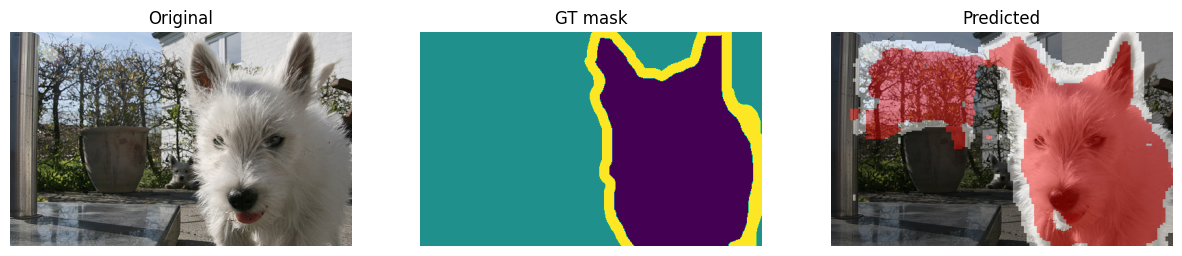

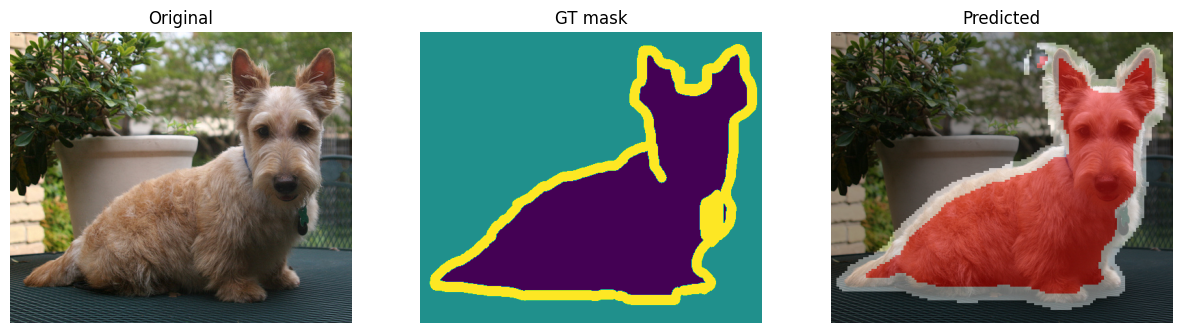

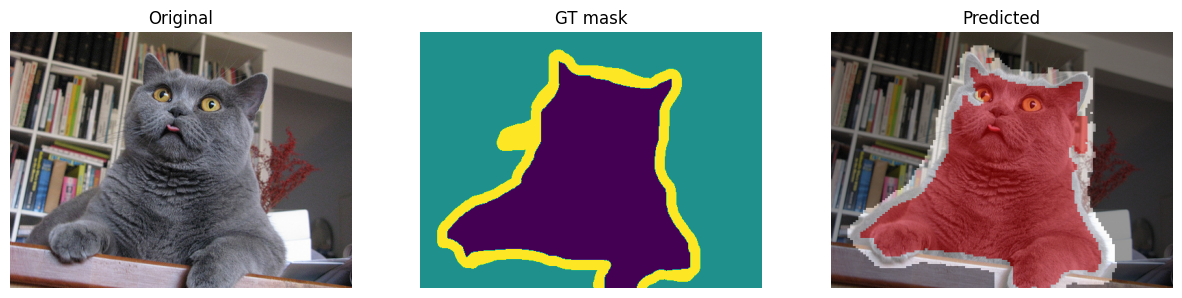

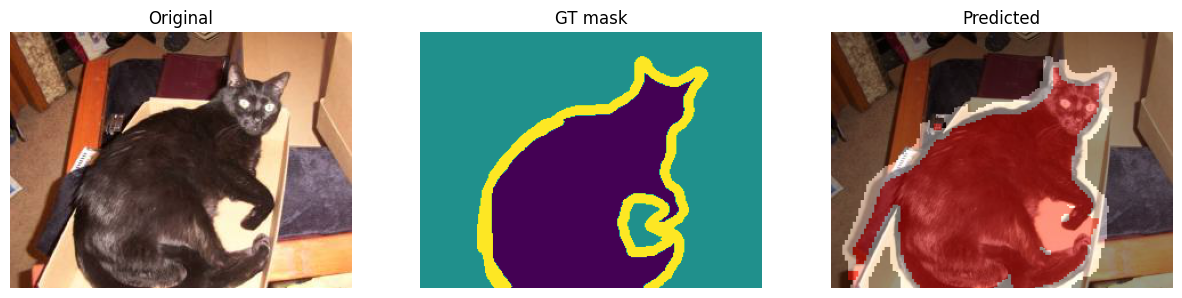

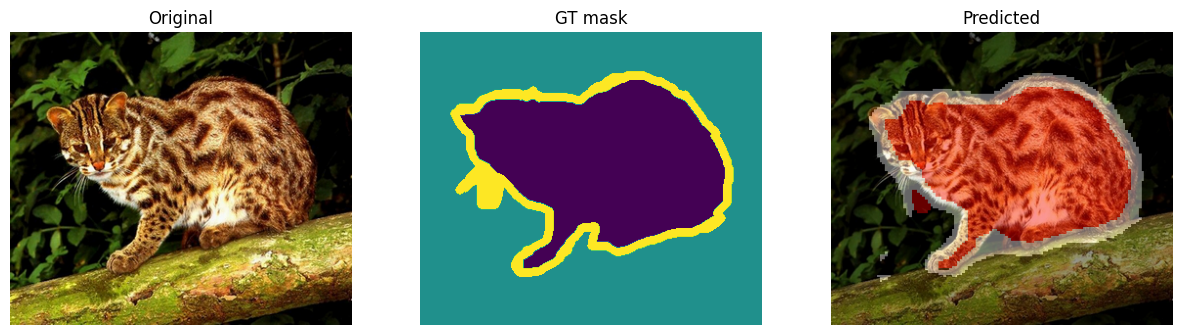

In [ ]:
for img_idx in random.sample(list(range(len(val_preds))), 5):
    plt.figure(figsize=(15,8))

    ori_img = image.load_img(val_input_img_paths[img_idx])
    target_img = image.load_img(val_target_img_paths[img_idx])
    target_mask = image.img_to_array(target_img)[:,:,0] - 1
    # 목표 이미지를 NumPy 배열로 변환한 후, 첫 번째 채널의 값을 가져와서 1을 뺍니다.
    #이 작업은 클래스 라벨을 0부터 시작하도록 하기 위함일 것입니다.
    mask = val_preds[img_idx]

    plt.subplot(1,3,1)
    plt.title('Original')
    plt.axis("off")
    plt.imshow(ori_img)

    plt.subplot(1,3,2)
    plt.title('GT mask')
    plt.axis("off")
    plt.imshow(target_mask)

    resized_mask = resize_mask(mask, ori_img.size)
    masked_img = add_mask_to_img(ori_img, resized_mask)

    plt.subplot(1,3,3)
    plt.title('Predicted')
    plt.axis("off")
    processed_mask = ero_dil(resized_mask)
    masked_img = add_mask_to_img(ori_img, processed_mask)
    plt.imshow(image.array_to_img(masked_img))

    plt.show()

## 8) Result Visualization

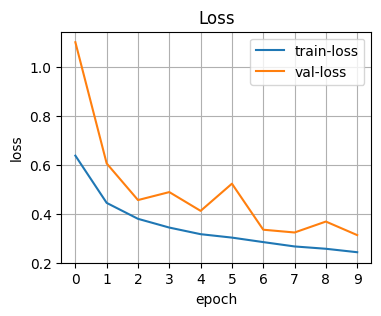

In [ ]:
history_unet = history.history

plt.figure(figsize=(4, 3))
plt.plot(history_unet['loss'], label='train-loss')
plt.plot(history_unet['val_loss'], label='val-loss')
plt.legend()
plt.grid()
plt.xticks(range(10))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Loss")
plt.show()
## segmentation의 로스는 어떻게 계산하는 걸까?

In [ ]:
!git clone https://github.com/lnugraha/trimap_generator.git